### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### checking the file path

In [5]:
import os
os.getcwd()

'C:\\Users\\jasir'

In [ ]:
plc = pd.read_csv("plc_machine_data_1year.csv", parse_dates=["timestamp"])

### load csv plc datafile

In [6]:
plc = pd.read_csv(
    "C:/Users/jasir/OneDrive/Desktop/Analysis/Factory Data/plc_machine_data.csv",
    parse_dates=["time_stamp"]
)

### seeing the data

In [7]:
plc.head()

,time_stamp,machine_id,machine_status,alarm_code,temperature_c,vibration_mm_s
0,2025-01-01 00:00:00,M-101,Running,NaN,68.89,4.41
1,2025-01-01 00:05:00,M-101,Running,A-02,74.48,3.96
2,2025-01-01 00:10:00,M-101,Running,NaN,62.18,3.83
3,2025-01-01 00:15:00,M-101,Running,A-03,66.45,2.35
4,2025-01-01 00:20:00,M-101,Running,A-07,58.92,3.69


### check the column types

In [8]:
plc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315360 entries, 0 to 315359
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   time_stamp      315360 non-null  datetime64[ns]
 1   machine_id      315360 non-null  object        
 2   machine_status  315360 non-null  object        
 3   alarm_code      94492 non-null   object        
 4   temperature_c   315360 non-null  float64       
 5   vibration_mm_s  315360 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 14.4+ MB


### sort data by time

In [9]:
plc = plc.sort_values(["machine_id", "time_stamp"])

### sensor behaviour

In [10]:
plc.groupby("machine_id")[["temperature_c", "vibration_mm_s"]].describe()

temperature_c                                                   \
                   count       mean       std    min    25%    50%    75%   
machine_id                                                                  
M-101           105120.0  65.021190  6.014969  38.22  60.96  65.05  69.07   
M-102           105120.0  64.986316  6.006407  39.30  60.93  65.01  69.05   
M-103           105120.0  64.960210  6.027087  39.84  60.88  64.96  69.02   

                  vibration_mm_s                                            \
              max          count      mean       std   min   25%  50%  75%   
machine_id                                                                   
M-101       90.21       105120.0  3.499565  0.599044  0.82  3.10  3.5  3.9   
M-102       89.92       105120.0  3.498234  0.600580  1.08  3.09  3.5  3.9   
M-103       89.86       105120.0  3.499359  0.599766  0.71  3.10  3.5  3.9   

                  
             max  
machine_id        
M-101       6.19  
M-102       6.31  
M-103       5.89

### rolling average
..... Machines will not fail suddently;they degrade slowly

In [11]:
plc["vibration_1h_avg"] = (
    plc.groupby("machine_id")["vibration_mm_s"]
       .rolling(window=12)
       .mean()
       .reset_index(0, drop=True)
)

### creating risk flag
..... normal vibration~~3-4
..... risk if >5

In [12]:
plc["high_vibration_flag"] = np.where(
    plc["vibration_1h_avg"] > 5,
    1,
    0
)

### identifying risk machines
.....which machines is frequently abnormal

In [13]:
plc[plc["high_vibration_flag"] == 1]["machine_id"].value_counts()

Series([], Name: count, dtype: int64)

### varifying the vibration value

In [14]:
plc["vibration_1h_avg"].max()a

SyntaxError: invalid syntax (4267548849.py, line 1)

### loading data maintenance

In [16]:
maint = pd.read_csv(
    "C:/Users/jasir/OneDrive/Desktop/Analysis/Factory Data/maintenance_data.csv",
    parse_dates=["failure_date"]
)

### checking prediction accuracy

In [17]:
risk_machines = plc.loc[
    plc["high_vibration_flag"] == 1,
    "machine_id"
].unique()

actual_failures = maint["machine_id"].unique()

set(risk_machines).intersection(actual_failures)

set()

### visualizing M-101 MACHINE

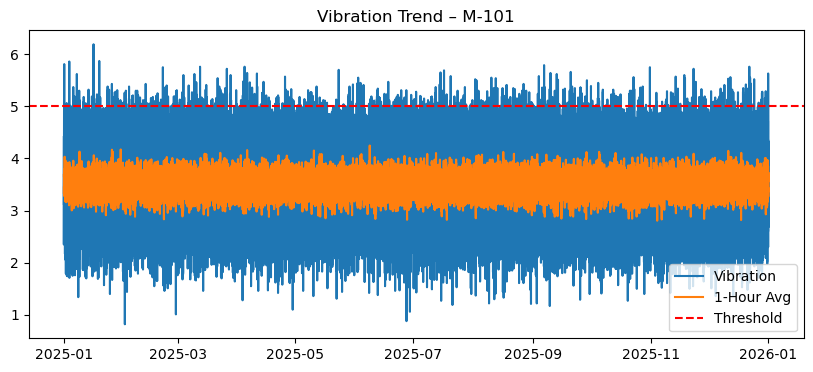

In [18]:
machine = "M-101"
data = plc[plc["machine_id"] == machine]

plt.figure(figsize=(10,4))
plt.plot(data["time_stamp"], data["vibration_mm_s"], label="Vibration")
plt.plot(data["time_stamp"], data["vibration_1h_avg"], label="1-Hour Avg")
plt.axhline(5, color="red", linestyle="--", label="Threshold")
plt.legend()
plt.title(f"Vibration Trend – {machine}")
plt.show()

In [ ]:
import os
os.getcwd()